In [42]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2450205248711108345,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4971491488
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3352311911140862131
 physical_device_desc: "device: 0, name: GeForce GTX 1660 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [43]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [44]:
#### 데이터 로드

In [155]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [156]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [157]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [158]:
for idx in range(10) :
    print(y_train[idx])

5
0
4
1
9
2
1
3
1
4


In [159]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [160]:
for idx in range(10) :
    print(y_train[idx])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [161]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape (10000, 784)

In [162]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [163]:
### 모델만들기

In [164]:
model = keras.Sequential()

model.add( keras.layers.Dense(256, activation='sigmoid',input_shape=(784, ), name='input' ) )

model.add( keras.layers.Dense(128, activation='sigmoid', name='hidden1' ) )
model.add( keras.layers.Dense(64, activation='sigmoid', name='hidden2' ) )
model.add( keras.layers.Dense(32, activation='sigmoid', name='hidden3' ) )

# 넬루 
#
#


model.add( keras.layers.Dense(10, activation='softmax', name='output' ) )

In [165]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 256)               200960    
_________________________________________________________________
hidden1 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


#### 모델컴파인

In [166]:
optimizer = keras.optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = optimizer,
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 256)               200960    
_________________________________________________________________
hidden1 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


#### 학습

In [168]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 200, validation_data = (x_test, y_test) )

Epoch 1/200
469/469 [==============================] - 2s 5ms/step - loss: 2.0377 - accuracy: 0.5080 - val_loss: 1.9793 - val_accuracy: 0.5208
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 1.9331 - accuracy: 0.5296 - val_loss: 1.8670 - val_accuracy: 0.5430
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 1.8160 - accuracy: 0.5580 - val_loss: 1.7418 - val_accuracy: 0.5734
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 1.6836 - accuracy: 0.5943 - val_loss: 1.6031 - val_accuracy: 0.6046
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 1.5397 - accuracy: 0.6303 - val_loss: 1.4587 - val_accuracy: 0.6587
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 1.3976 - accuracy: 0.6673 - val_loss: 1.3226 - val_accuracy: 0.6854
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 1.2671 - accuracy: 0.6938 - val_loss: 1.2005 - val_accuracy: 0.7105

Epoch 58/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1522 - accuracy: 0.9660 - val_loss: 0.2093 - val_accuracy: 0.9478
Epoch 59/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1488 - accuracy: 0.9669 - val_loss: 0.2093 - val_accuracy: 0.9490
Epoch 60/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1471 - accuracy: 0.9672 - val_loss: 0.2065 - val_accuracy: 0.9470
Epoch 61/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1436 - accuracy: 0.9678 - val_loss: 0.2070 - val_accuracy: 0.9486
Epoch 62/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1384 - accuracy: 0.9686 - val_loss: 0.2058 - val_accuracy: 0.9476
Epoch 63/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1364 - accuracy: 0.9698 - val_loss: 0.1986 - val_accuracy: 0.9511
Epoch 64/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1331 - accuracy: 0.9700 - val_loss: 0.1979 - val_accuracy:

Epoch 115/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0589 - accuracy: 0.9876 - val_loss: 0.1648 - val_accuracy: 0.9551
Epoch 116/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0599 - accuracy: 0.9871 - val_loss: 0.1616 - val_accuracy: 0.9576
Epoch 117/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0599 - accuracy: 0.9868 - val_loss: 0.1609 - val_accuracy: 0.9556
Epoch 118/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0587 - accuracy: 0.9873 - val_loss: 0.1644 - val_accuracy: 0.9570
Epoch 119/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0586 - accuracy: 0.9873 - val_loss: 0.1646 - val_accuracy: 0.9561
Epoch 120/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0568 - accuracy: 0.9879 - val_loss: 0.1585 - val_accuracy: 0.9572
Epoch 121/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0540 - accuracy: 0.9890 - val_loss: 0.1616 - val_ac

469/469 [==============================] - 2s 4ms/step - loss: 0.0124 - accuracy: 0.9990 - val_loss: 0.1550 - val_accuracy: 0.9604
Epoch 172/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0121 - accuracy: 0.9991 - val_loss: 0.1553 - val_accuracy: 0.9592
Epoch 173/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0119 - accuracy: 0.9990 - val_loss: 0.1560 - val_accuracy: 0.9595
Epoch 174/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0117 - accuracy: 0.9991 - val_loss: 0.1559 - val_accuracy: 0.9588
Epoch 175/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0116 - accuracy: 0.9990 - val_loss: 0.1563 - val_accuracy: 0.9591
Epoch 176/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0113 - accuracy: 0.9991 - val_loss: 0.1563 - val_accuracy: 0.9594
Epoch 177/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0113 - accuracy: 0.9990 - val_loss: 0.1561 - val_accuracy: 0.9594

#### 평가

In [141]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [142]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3024 - accuracy: 0.9263


[0.3024339973926544, 0.9262999892234802]

In [143]:
import matplotlib.pyplot as plt

x_train = x_train.reshape(60000, 28, 28)

plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.axis('off')
plt.show()

ValueError: cannot reshape array of size 32928000 into shape (60000,28,28)

In [80]:
# 데이터 로드부터 다시한번 

In [144]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [145]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [146]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape (10000, 784)

In [147]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [148]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers    import Dropout
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                 test_size = 0.3,
                                                 random_state = 100)

In [149]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((42000, 784), (18000, 784), (42000, 10), (18000, 10))

#### 모델을 구성하는 두번째 방법
- 함수형 API

In [150]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model

input = Input(shape=(784,), name='input')

hidden1 = Dense(256, activation='sigmoid', name='hidden1' )(input)
hidden2 = Dense(128, activation='sigmoid', name='hidden2' )(hidden1)
hidden3 = Dense(64, activation='sigmoid', name='hidden3' )(hidden2)
hidden4 = Dense(32, activation='sigmoid', name='hidden4' )(hidden3)

output = Dense(10, activation='softmax', name='output' )(hidden4)

model = Model(inputs=[input], outputs = [output])

In [151]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
hidden2 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden3 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden4 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_____________________________________________________

In [152]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate = 0.01)
model.compile(optimizer = optimizer,
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [154]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 100, validation_data = (x_val, y_val) )

Epoch 1/100
329/329 [==============================] - 1s 4ms/step - loss: 2.1747 - accuracy: 0.3416 - val_loss: 2.1529 - val_accuracy: 0.3434
Epoch 2/100
329/329 [==============================] - 1s 4ms/step - loss: 2.1275 - accuracy: 0.3552 - val_loss: 2.0972 - val_accuracy: 0.3815
Epoch 3/100
329/329 [==============================] - 1s 4ms/step - loss: 2.0640 - accuracy: 0.3677 - val_loss: 2.0256 - val_accuracy: 0.3969
Epoch 4/100
329/329 [==============================] - 1s 4ms/step - loss: 1.9865 - accuracy: 0.3912 - val_loss: 1.9439 - val_accuracy: 0.3876
Epoch 5/100
329/329 [==============================] - 1s 4ms/step - loss: 1.9034 - accuracy: 0.4081 - val_loss: 1.8609 - val_accuracy: 0.4388
Epoch 6/100
329/329 [==============================] - 1s 4ms/step - loss: 1.8214 - accuracy: 0.4458 - val_loss: 1.7805 - val_accuracy: 0.4809
Epoch 7/100
329/329 [==============================] - 1s 4ms/step - loss: 1.7418 - accuracy: 0.4924 - val_loss: 1.7023 - val_accuracy: 0.5309

Epoch 58/100
329/329 [==============================] - 1s 4ms/step - loss: 0.2798 - accuracy: 0.9414 - val_loss: 0.3554 - val_accuracy: 0.9142
Epoch 59/100
329/329 [==============================] - 1s 4ms/step - loss: 0.2745 - accuracy: 0.9409 - val_loss: 0.3434 - val_accuracy: 0.9173
Epoch 60/100
329/329 [==============================] - 1s 4ms/step - loss: 0.2660 - accuracy: 0.9442 - val_loss: 0.3390 - val_accuracy: 0.9197
Epoch 61/100
329/329 [==============================] - 1s 4ms/step - loss: 0.2590 - accuracy: 0.9452 - val_loss: 0.3336 - val_accuracy: 0.9177
Epoch 62/100
329/329 [==============================] - 1s 4ms/step - loss: 0.2584 - accuracy: 0.9453 - val_loss: 0.3288 - val_accuracy: 0.9199
Epoch 63/100
329/329 [==============================] - 1s 4ms/step - loss: 0.2529 - accuracy: 0.9460 - val_loss: 0.3277 - val_accuracy: 0.9219
Epoch 64/100
329/329 [==============================] - 1s 4ms/step - loss: 0.2448 - accuracy: 0.9477 - val_loss: 0.3208 - val_accuracy:

In [134]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [135]:
history_dict = history.history

loss     = history_dict['loss']
val_loss = history_dict['val_loss']

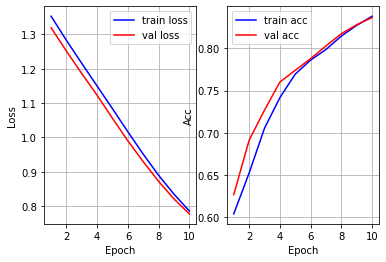

In [136]:
fig = plt.figure()
ax01 = fig.add_subplot(1,2,1)

epochs = range(1, len(loss)+1)

ax01.plot(epochs, loss     , color='blue', label='train loss')
ax01.plot(epochs, val_loss , color='red',  label='val loss')
ax01.set_xlabel('Epoch')
ax01.set_ylabel('Loss')
ax01.grid()
ax01.legend()


acc     = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

ax02 = fig.add_subplot(1,2,2)
ax02.plot(epochs, acc     , color='blue', label='train acc')
ax02.plot(epochs, val_acc , color='red',  label='val acc')
ax02.set_xlabel('Epoch')
ax02.set_ylabel('Acc')
ax02.grid()
ax02.legend()


In [137]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7699 - accuracy: 0.8401


[0.7699249982833862, 0.8400999903678894]